In [2]:
%pip install --upgrade -q pip setuptools wheel
%pip install -q Pylance PyObjC pythainlp openai gtts matplotlib playsound

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib as mpl
import os
import matplotlib.font_manager
import shutil
if os.path.exists('./Sarabun-Regular.ttf'):
    os.remove('./Sarabun-Regular.ttf')
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')

In [2]:
import logging
logging.disable(logging.CRITICAL)

In [3]:
from pythainlp.tokenize import word_tokenize
from icrawler.builtin import GoogleImageCrawler
from playsound import playsound
from openai import OpenAI
from gtts import gTTS
import os
import shutil
import random

from PIL import Image
import matplotlib.pyplot as plt

os.environ["OPENTYPHOON_API_KEY"]='sk-psIjnhS63MFqDJzmrCnY6iLPr3iZ6wAXP57La0dvUcNoE9dc'
client = OpenAI(
    api_key=os.environ.get("OPENTYPHOON_API_KEY"),
    base_url="https://api.opentyphoon.ai/v1",
)

def get_random_file_path(directory):
    all_items = os.listdir(directory)
    files = [f for f in all_items if os.path.isfile(os.path.join(directory, f))]
    if not files:
        return None
    random_file = random.choice(files)
    return os.path.join(directory, random_file)

def cue_hierachy(level, target_word):
    
    if os.path.exists('./img'):
        shutil.rmtree('./img')
        
    google_crawler = GoogleImageCrawler(storage={'root_dir': './img'})
    google_crawler.crawl(keyword=target_word, max_num=3)
    semantic_cue = f"""คุณเป็นนักบำบัดการพูดที่กำลังช่วยผู้ป่วยที่มีภาวะเสียการพูดฝึกฝนทักษะการพูดและการสื่อสาร จากโรค Aphasia
    ผู้ป่วยอาจมีปัญหาในการหาคำและการสร้างประโยค คุณมีหน้าที่ช่วยผู้ป่วยให้สามารถคิดคำที่คุณใบ้ออก <โดยห้ามบอกถึงโดยตรง>
    การใบ้คนไข้คุณต้องอธิบายประเภทของสิ่งที่จะใบ้ เช่น
    ตัวอย่างการใบ้คุณยประเภทสำหรับคำว่า "แอปเปิ้ล"
    มันเป็นผลไม้
    ตัวอย่างการใบ้คุณยประเภทสำหรับคำว่า "รถยนต์"
    มันคือยานพาหนะ
    """

    sentence_completion_cue = f"""คุณเป็นนักบำบัดการพูดที่กำลังช่วยผู้ป่วยที่มีภาวะเสียการพูดฝึกฝนทักษะการพูดและการสื่อสาร จากโรค Aphasia
    ผู้ป่วยอาจมีปัญหาในการหาคำและการสร้างประโยค คุณมีหน้าที่ช่วยผู้ป่วยให้สามารถคิดคำที่คุณใบ้ออก <โดยห้ามบอกถึงโดยตรง>
    การใบ้คนไข้คุณต้องสร้างประโยคที่กำลังใช้หรือมีปฏิสัมพันธ์ของสิ่งที่จะใบ้ เช่น
    ตัวอย่างการใบ้คำว่า "แอปเปิ้ล"
    ผมกำลังเดินทางไปตลาดเผื่อซื้อผลไม้สีแดงสดมาทำขนมพาย
    """

    phonemic_cue = f"""คุณเป็นนักบำบัดการพูดที่กำลังช่วยผู้ป่วยที่มีภาวะเสียการพูดฝึกฝนทักษะการพูดและการสื่อสาร จากโรค Aphasia
    ผู้ป่วยอาจมีปัญหาในการหาคำและการสร้างประโยค คุณมีหน้าที่ช่วยผู้ป่วยให้สามารถคิดคำที่คุณใบ้ออก <โดยห้ามบอกถึงโดยตรง>
    การใบ้คนไข้คุณต้องอธิบายลักษณะของเสียงพยัญชนะแรกของสิ่งที่จะใบ้ของคำๆนั้น เช่น
    ตัวอย่างการใบ้คำว่า "แอปเปิ้ล"
    เสียง ออ
    ตัวอย่างการใบ้คำว่า "กล้วย"
    เสียง กอ
    ตัวอย่างการใบ้คำว่า "คน"
    เสียง คอ
    """

    functional_description_cue = f"""คุณเป็นนักบำบัดการพูดที่กำลังช่วยผู้ป่วยที่มีภาวะเสียการพูดฝึกฝนทักษะการพูดและการสื่อสาร จากโรค Aphasia
    ผู้ป่วยอาจมีปัญหาในการหาคำและการสร้างประโยค คุณมีหน้าที่ช่วยผู้ป่วยให้สามารถคิดคำที่คุณใบ้ออก <โดยห้ามบอกถึงโดยตรง>
    การใบ้คนไข้คุณต้องอธิบายลักษณะของสิ่งที่จะใบ้ เช่น
    ตัวอย่างการใบ้คุณลักษณะสำหรับคำว่า "แอปเปิ้ล"
    มันเป็นผลไม้ที่เอาไว้กิน มีสีแดงหรือสีเขียว มีผิวที่กลมและเรียบ มีขายตามห้างหรือร้านขายผลไม้
    """
    
    if level == 0:
        mode = semantic_cue
    elif level == 1:
        mode = sentence_completion_cue
    elif level == 2:
        mode = phonemic_cue
    elif level == 3:
        print('='*50)
        tts = gTTS(target_word, lang='th')
        tts.save('temp.mp3')
        playsound('temp.mp3')
        user_input = input('ตอบ')
        print(f'-> {user_input}')
        user_respond = word_tokenize(user_input, engine="newmm")
        if target_word in user_respond:
            return True
        else:
            return False
    elif level == 4:
        mode = functional_description_cue
        plt.figure(figsize=(4, 2))
        plt.imshow(Image.open(get_random_file_path('./img')))
        plt.axis('off')
        plt.show()
    elif level == 5:
        plt.figure(figsize=(4, 2))
        plt.text(0.5, 0.5, target_word, fontsize=36, ha='center', va='center', transform=plt.gca().transAxes)
        plt.axis('off')
        plt.show()
        playsound('temp.mp3')
        user_respond = word_tokenize(input(), engine="newmm")
        if target_word in user_respond:
            return True
        else:
            return False
    else:
        return None

    stream = client.chat.completions.create(
    model="typhoon-instruct",
    messages=[
        {
            "role": "systemp",
            "content": f'{mode}',
        },
        {
            "role": "user",
            "content": f"ผมอยากพูดคำว่า {target_word}",
        }
    ],
    
    max_tokens=300,
    temperature=0,
    top_p=0.99,
    stream=True,
    )

    respond=[]
    for chunk in stream:
        if hasattr(chunk, 'choices') and len(chunk.choices) > 0:
            choice = chunk.choices[0]
            if hasattr(choice, 'delta') and hasattr(choice.delta, 'content'):
                if choice.delta.content is not None:
                    respond.append(choice.delta.content)
    print('='*50)
    
    print(("".join(respond).replace(target_word, '')))
    user_input = input('ตอบ')
    print(f'-> {user_input}')
    user_respond = word_tokenize(user_input, engine="newmm")
    if target_word in user_respond:
        return True, "".join(respond)
    else:
        return False, "".join(respond)
    
def main(target):
    for i in range(6):
        if cue_hierachy(i, target) == True:
            break

0.Semantic Cue : อธิบายประเภท

1.Sentence Completion Cue :สร้างประโยคที่เกี่ยวข้อง

2.Phonemic Cue : อะิบายเสียงแรก

3.Modeling Cue : เล่นเสียง

4.Functional Description Cue : อธิบายรายละเอียด

5.Printed Word Cue : เปิดคำ

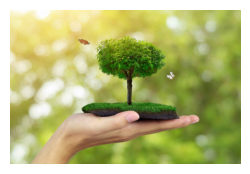

เป็นสิ่งมีชีวิตที่มีขนาดใหญ่ มีลำต้นที่สูงและมีใบ เมื่อโตเต็มที่จะมีผล ผลไม้บางชนิดก็สามารถกินได้ มักจะพบในสวน, ป่า, หรือที่โล่งๆ
-> ต้นไม้


(True,
 'ต้นไม้เป็นสิ่งมีชีวิตที่มีขนาดใหญ่ มีลำต้นที่สูงและมีใบ เมื่อโตเต็มที่จะมีผล ผลไม้บางชนิดก็สามารถกินได้ ต้นไม้มักจะพบในสวน, ป่า, หรือที่โล่งๆ')

In [5]:
cue_hierachy(4, 'ต้นไม้')

มันเป็นสัตว์ชนิดหนึ่ง ที่มีขนาดเล็ก และมีปีก
-> นก
เมื่อวานฉันเห็นสัตว์ที่มีขนสีขาวและสีดำ มันสามารถว่ายน้ำได้และชอบกินอาหารจากพื้นดิน
-> ห่าน
เสียง เป
-> ปูด
-> เก็ด


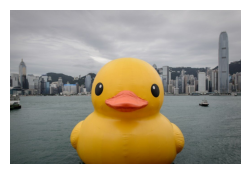

มันเป็นสัตว์ที่มีขนาดเล็ก มีปีกและมีหางยาว มักจะว่ายน้ำในน้ำ มีหลายสี เช่น ขาว, ดำ, หรือน้ำตาล มักจะพบได้ในทุ่งนาหรือสวนสาธารณะ
-> เต่างอย


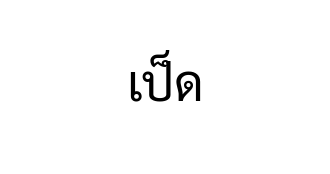

In [4]:
main('เป็ด')

มันเป็นสัตว์ชนิดหนึ่ง ที่มีขนาดเล็ก และมีปีก
-> นกกระจิบ
เมื่อวานฉันเห็นสัตว์ที่มีขนสีขาวและสีดำ มันสามารถว่ายน้ำได้และชอบกินอาหารจากพื้นดิน
-> ห่าน
เสียง เป
-> โด
-> เปรต


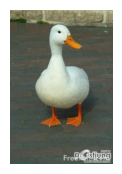

มันเป็นสัตว์ที่มีขนาดเล็ก มีปีกและมีหางยาว มักจะว่ายน้ำในน้ำ มีหลายสี เช่น ขาว, ดำ, หรือน้ำตาล มักจะพบได้ในทุ่งนาหรือสวนสาธารณะ
-> หงส์


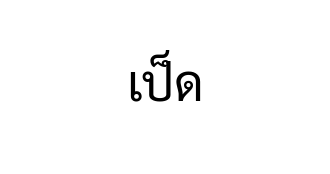

In [6]:
main('เป็ด')